In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [3]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv",index_col='Id')
#데이터셋 import

# **Exploring Data**

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.set_option('display.max_columns', None)
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [6]:
df.shape

(1460, 81)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
# pd.set_option('display.max_rows', None)

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df = df.dropna(axis=1, how='any')
#결측치 하나라도 있는 열 제거함  81줄이 -> 62줄이됨

In [11]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [12]:
duplicate_rows = df.duplicated()
len(df[duplicate_rows])

#중복된 행의 수 반환

0

In [13]:
len(df.columns)

62

In [14]:
# pd.set_option('display.max_rows', None)
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 62, dtype: object

In [15]:
ptr_df=df.copy()
# ptr_df.head()

# **Display outlier**

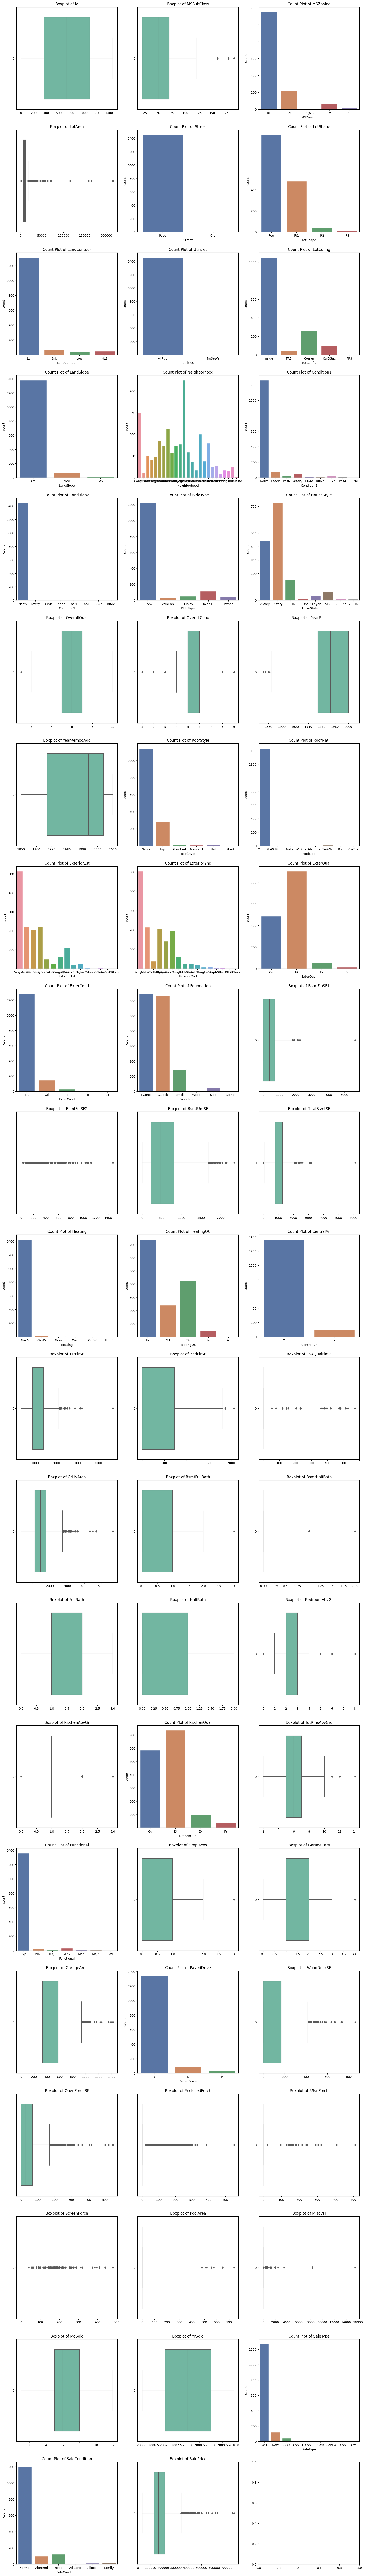

In [15]:
fig, axes = plt.subplots(21, 3, figsize=(20, 150))
for i, (column_name, column_data) in enumerate(ptr_df.items()):
    sns.set(style="whitegrid")
    row = i // 3  
    col = i % 3   
    if ptr_df[column_name].dtype == 'int64' or ptr_df[column_name].dtype == 'float64':
        sns.boxplot(data=column_data, orient="h", palette="Set2", ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot of {column_name}')
    else:
        sns.countplot(x=column_name, data=ptr_df, ax=axes[row, col])
        axes[row, col].set_title(f'Count Plot of {column_name}')
plt.show()

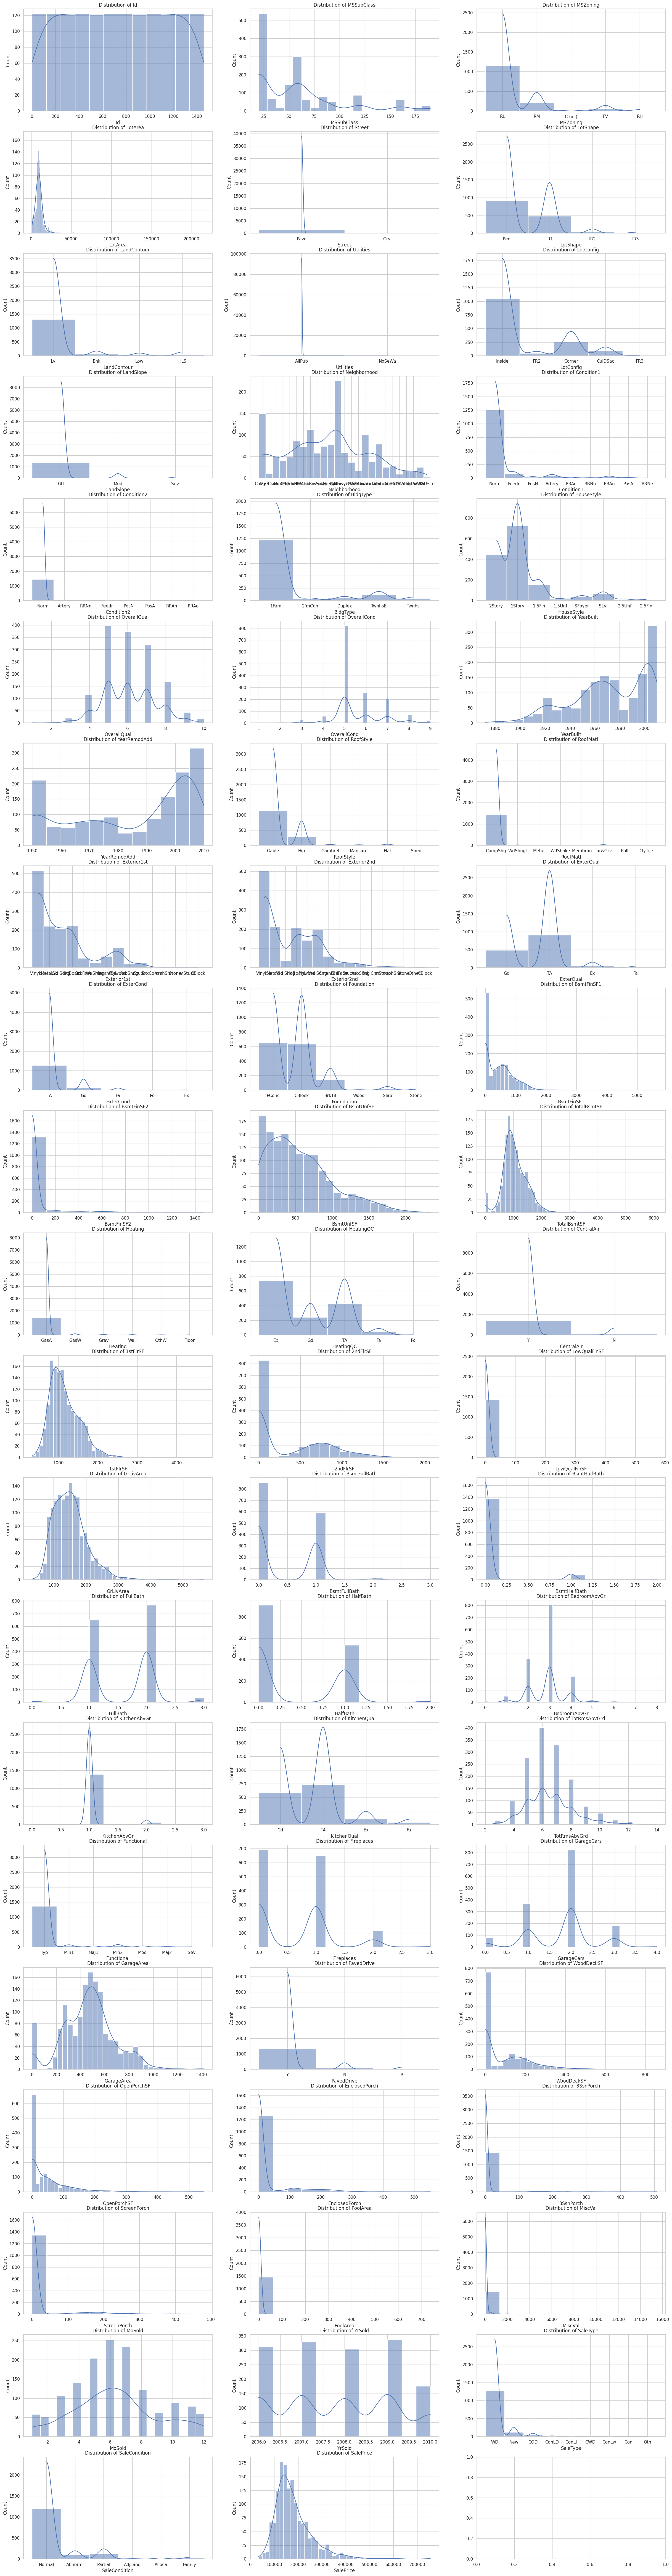

In [16]:
fig, axes = plt.subplots(21, 3, figsize=(30, 120))
for i, (column_name, column_data) in enumerate(ptr_df.items()):
    sns.set(style="whitegrid")
    row = i // 3  
    col = i % 3   
    sns.histplot(column_data, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column_name}')
plt.show()

we can clearly see that there are outlier present in our datset

In [17]:
column_are_not_helpful_in_prediction=ptr_df[['Street','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl','ExterCond','BsmtFinSF2','Heating','CentralAir','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','Functional','PavedDrive','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleType','SaleCondition','BldgType']]
column_are_not_helpful_in_prediction

,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,RoofMatl,ExterCond,BsmtFinSF2,Heating,CentralAir,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,Functional,PavedDrive,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,BldgType
0,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,Y,0,0,1,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
1,Pave,Lvl,AllPub,Gtl,Feedr,Norm,CompShg,TA,0,GasA,Y,0,1,1,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
2,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,Y,0,0,1,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
3,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,Y,0,0,1,Typ,Y,272,0,0,0,0,WD,Abnorml,1Fam
4,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,Y,0,0,1,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,0,GasA,Y,0,0,1,Typ,Y,0,0,0,0,0,WD,Normal,1Fam
1456,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,163,GasA,Y,0,0,1,Min1,Y,0,0,0,0,0,WD,Normal,1Fam
1457,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,Gd,0,GasA,Y,0,0,1,Typ,Y,0,0,0,0,2500,WD,Normal,1Fam
1458,Pave,Lvl,AllPub,Gtl,Norm,Norm,CompShg,TA,1029,GasA,Y,0,0,1,Typ,Y,112,0,0,0,0,WD,Normal,1Fam


In [18]:
ptr_df.drop(column_are_not_helpful_in_prediction, axis=1, inplace=True)


In [19]:
ptr_df
#24개의 column제거 -> outlier존재하는 열

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,Gd,PConc,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,2,548,0,61,2,2008,208500
1,2,20,RL,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,TA,CBlock,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,2,460,298,0,5,2007,181500
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,Gd,PConc,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,2,608,0,42,9,2008,223500
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,TA,BrkTil,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,3,642,0,35,2,2006,140000
4,5,60,RL,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,Gd,PConc,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Reg,Inside,Gilbert,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,TA,PConc,0,953,953,Ex,953,694,1647,0,2,1,3,TA,7,1,2,460,0,40,8,2007,175000
1456,1457,20,RL,13175,Reg,Inside,NWAmes,1Story,6,6,1978,1988,Gable,Plywood,Plywood,TA,CBlock,790,589,1542,TA,2073,0,2073,1,2,0,3,TA,7,2,2,500,349,0,2,2010,210000
1457,1458,70,RL,9042,Reg,Inside,Crawfor,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,Ex,Stone,275,877,1152,Ex,1188,1152,2340,0,2,0,4,Gd,9,2,1,252,0,60,5,2010,266500
1458,1459,20,RL,9717,Reg,Inside,NAmes,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,TA,CBlock,49,0,1078,Gd,1078,0,1078,1,1,0,2,Gd,5,0,1,240,366,0,4,2010,142125


In [20]:
def remove_outliers(df, columns, threshold=1.5):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_remove_outliers = ['MSSubClass','OverallQual','OverallCond','BsmtFinSF1','2ndFlrSF','BsmtFullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']


removed_outlier = remove_outliers(ptr_df, columns_to_remove_outliers)


removed_outlier




,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,RL,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,Gd,PConc,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,2,548,0,61,2,2008,208500
2,3,60,RL,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,Gd,PConc,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,2,608,0,42,9,2008,223500
3,4,70,RL,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,TA,BrkTil,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,3,642,0,35,2,2006,140000
5,6,50,RL,14115,IR1,Inside,Mitchel,1.5Fin,5,5,1993,1995,Gable,VinylSd,VinylSd,TA,Wood,732,64,796,Ex,796,566,1362,1,1,1,1,TA,5,0,2,480,40,30,10,2009,143000
6,7,20,RL,10084,Reg,Inside,Somerst,1Story,8,5,2004,2005,Gable,VinylSd,VinylSd,Gd,PConc,1369,317,1686,Ex,1694,0,1694,1,2,0,3,Gd,7,1,2,636,255,57,8,2007,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,7500,Reg,Inside,Somerst,1Story,7,5,2004,2005,Gable,VinylSd,VinylSd,Gd,PConc,410,811,1221,Ex,1221,0,1221,1,2,0,2,Gd,6,0,2,400,0,113,10,2009,185000
1455,1456,60,RL,7917,Reg,Inside,Gilbert,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,TA,PConc,0,953,953,Ex,953,694,1647,0,2,1,3,TA,7,1,2,460,0,40,8,2007,175000
1456,1457,20,RL,13175,Reg,Inside,NWAmes,1Story,6,6,1978,1988,Gable,Plywood,Plywood,TA,CBlock,790,589,1542,TA,2073,0,2073,1,2,0,3,TA,7,2,2,500,349,0,2,2010,210000
1458,1459,20,RL,9717,Reg,Inside,NAmes,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,TA,CBlock,49,0,1078,Gd,1078,0,1078,1,1,0,2,Gd,5,0,1,240,366,0,4,2010,142125


In [21]:
removed_outlier.shape

(1014, 38)

In [22]:
removed_outlier.dtypes

Id               int64
MSSubClass       int64
MSZoning        object
LotArea          int64
LotShape        object
LotConfig       object
Neighborhood    object
HouseStyle      object
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
RoofStyle       object
Exterior1st     object
Exterior2nd     object
ExterQual       object
Foundation      object
BsmtFinSF1       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
HeatingQC       object
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
BsmtFullBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [23]:
def factorize_categorical_columns(column):
    if column.dtype == 'object':
        column_encoded, _ = pd.factorize(column)
        return column_encoded
    return column

# Apply factorize only to categorical columns
df_encoded = removed_outlier.apply(factorize_categorical_columns)

# 'df_encoded' now contains the encoded values for categorical columns

#문자열을 분류해서 각 정수에 배치하는 느낌 ㅇㅇ

In [24]:
df_encoded

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,0,8450,0,0,0,0,7,5,2003,2003,0,0,0,0,0,706,150,856,0,856,854,1710,1,2,1,3,0,8,0,2,548,0,61,2,2008,208500
2,3,60,0,11250,1,0,0,0,7,5,2001,2002,0,0,0,0,0,486,434,920,0,920,866,1786,1,2,1,3,0,6,1,2,608,0,42,9,2008,223500
3,4,70,0,9550,1,1,1,0,7,5,1915,1970,0,1,1,1,1,216,540,756,1,961,756,1717,1,1,0,3,0,7,1,3,642,0,35,2,2006,140000
5,6,50,0,14115,1,0,2,1,5,5,1993,1995,0,0,0,1,2,732,64,796,0,796,566,1362,1,1,1,1,1,5,0,2,480,40,30,10,2009,143000
6,7,20,0,10084,0,0,3,2,8,5,2004,2005,0,0,0,0,0,1369,317,1686,0,1694,0,1694,1,2,0,3,0,7,1,2,636,255,57,8,2007,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,3,7500,0,0,3,2,7,5,2004,2005,0,0,0,0,0,410,811,1221,0,1221,0,1221,1,2,0,2,0,6,0,2,400,0,113,10,2009,185000
1455,1456,60,0,7917,0,0,14,0,6,5,1999,2000,0,0,0,1,0,0,953,953,0,953,694,1647,0,2,1,3,1,7,1,2,460,0,40,8,2007,175000
1456,1457,20,0,13175,0,0,4,2,6,6,1978,1988,0,7,5,1,3,790,589,1542,2,2073,0,2073,1,2,0,3,1,7,2,2,500,349,0,2,2010,210000
1458,1459,20,0,9717,0,0,7,2,5,6,1950,1996,1,4,3,1,3,49,0,1078,1,1078,0,1078,1,1,0,2,0,5,0,1,240,366,0,4,2010,142125


In [25]:
df_encoded.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
final_df=df_encoded[['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
#이거 왜해주는거야? 따로 빼주네?

In [27]:
final_df

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,0,8450,0,0,0,0,7,5,0,0,0,0,0,706,150,856,0,856,854,1710,1,2,1,3,0,8,0,2,548,0,61,208500
2,60,0,11250,1,0,0,0,7,5,0,0,0,0,0,486,434,920,0,920,866,1786,1,2,1,3,0,6,1,2,608,0,42,223500
3,70,0,9550,1,1,1,0,7,5,0,1,1,1,1,216,540,756,1,961,756,1717,1,1,0,3,0,7,1,3,642,0,35,140000
5,50,0,14115,1,0,2,1,5,5,0,0,0,1,2,732,64,796,0,796,566,1362,1,1,1,1,1,5,0,2,480,40,30,143000
6,20,0,10084,0,0,3,2,8,5,0,0,0,0,0,1369,317,1686,0,1694,0,1694,1,2,0,3,0,7,1,2,636,255,57,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,3,7500,0,0,3,2,7,5,0,0,0,0,0,410,811,1221,0,1221,0,1221,1,2,0,2,0,6,0,2,400,0,113,185000
1455,60,0,7917,0,0,14,0,6,5,0,0,0,1,0,0,953,953,0,953,694,1647,0,2,1,3,1,7,1,2,460,0,40,175000
1456,20,0,13175,0,0,4,2,6,6,0,7,5,1,3,790,589,1542,2,2073,0,2073,1,2,0,3,1,7,2,2,500,349,0,210000
1458,20,0,9717,0,0,7,2,5,6,1,4,3,1,3,49,0,1078,1,1078,0,1078,1,1,0,2,0,5,0,1,240,366,0,142125


# **Heatmap to see correlation**

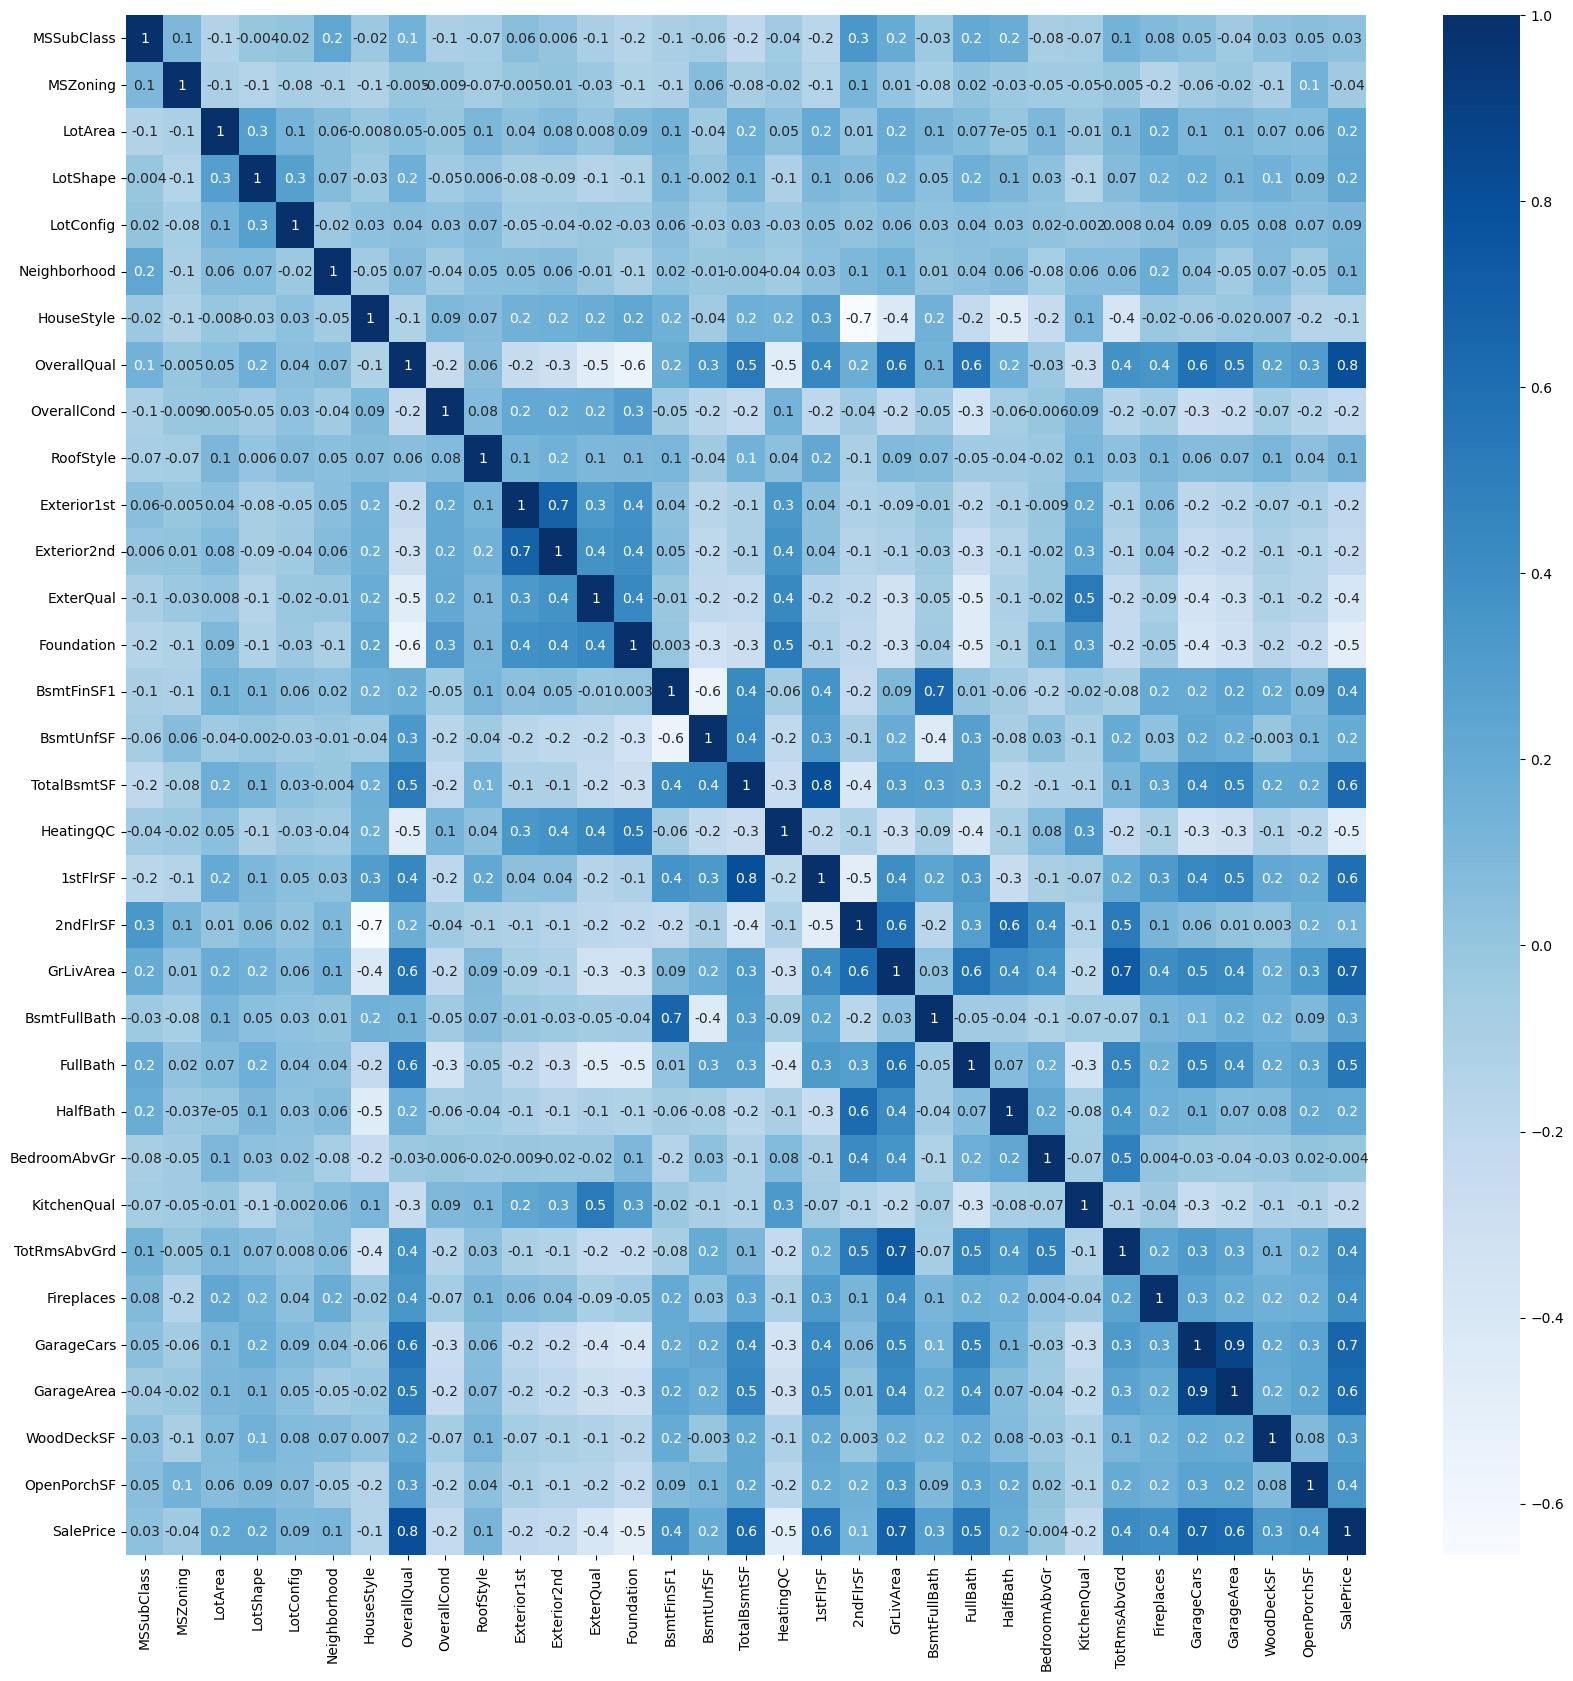

In [28]:
cor=final_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

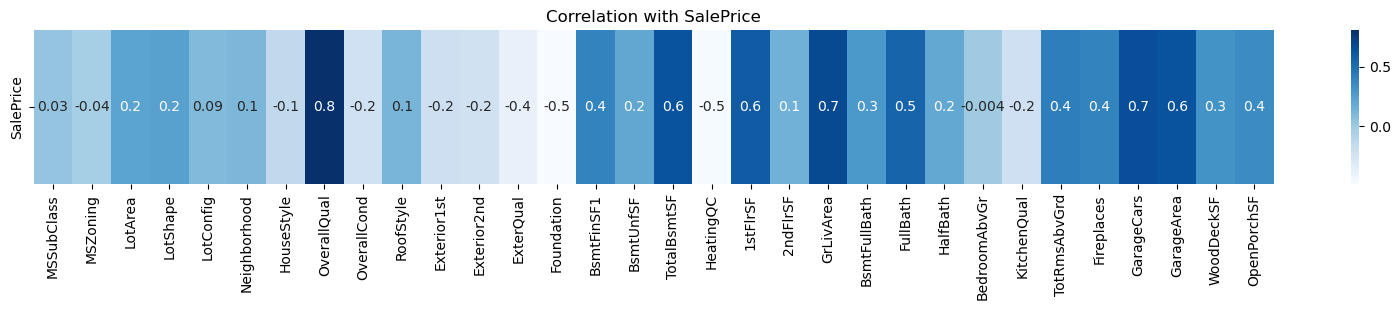

In [29]:
# Extract the correlation of 'SalePrice' with other factors
correlation_with_saleprice = cor['SalePrice']

# Create a heatmap of the correlation
plt.figure(figsize=(20, 2))
sns.heatmap(data=correlation_with_saleprice[:-1].to_frame().T, annot=True, cmap='Blues', fmt='.1g')
plt.title('Correlation with SalePrice')
plt.show()

# **Selecting Highly correlated variable**

In [30]:
# Find highly correlated features
highly_correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.5:  
            colname_i = cor.columns[i]
            colname_j = cor.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Convert the set of highly correlated features to a list
highly_correlated_features_list = list(highly_correlated_features)

# Print or inspect the highly correlated features
print(highly_correlated_features_list)


['SalePrice', 'GarageCars', 'Exterior1st', 'FullBath', 'Exterior2nd', 'OverallQual', '1stFlrSF', 'KitchenQual', 'ExterQual', 'HalfBath', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea', 'GrLivArea', 'Foundation', 'HouseStyle', 'TotRmsAbvGrd', 'BsmtUnfSF', 'BsmtFullBath', 'HeatingQC', 'BsmtFinSF1']


In [31]:
sel_df=final_df[['GarageCars', 'HeatingQC', 'BsmtFinSF1', '2ndFlrSF', 'TotRmsAbvGrd', 'HouseStyle', 'SalePrice', 'TotalBsmtSF', 'Exterior1st', '1stFlrSF', 'OverallQual', 'FullBath', 'Exterior2nd', 'KitchenQual', 'BsmtFullBath', 'GarageArea', 'HalfBath', 'Foundation', 'BsmtUnfSF', 'ExterQual', 'GrLivArea']]

sel_df.shape

(1014, 21)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(sel_df,i) for i in range(sel_df.shape[1])]
vif['features']=sel_df.columns
#vif지수를 확인한다. (다중공선성)

In [33]:
vif

,VIF,features
0,39.947857,GarageCars
1,2.875315,HeatingQC
2,15.704668,BsmtFinSF1
3,170.777187,2ndFlrSF
4,68.715139,TotRmsAbvGrd
5,4.900665,HouseStyle
6,54.374619,SalePrice
7,76.980054,TotalBsmtSF
8,3.365545,Exterior1st
9,1141.777385,1stFlrSF


In [34]:
data_no_multicollinearity=sel_df[['ExterQual','Foundation','HalfBath','BsmtFullBath','KitchenQual','Exterior2nd','Exterior1st','HouseStyle','HeatingQC']]
data_no_multicollinearity

,ExterQual,Foundation,HalfBath,BsmtFullBath,KitchenQual,Exterior2nd,Exterior1st,HouseStyle,HeatingQC
0,0,0,1,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0
3,1,1,0,1,0,1,1,0,1
5,1,2,1,1,1,0,0,1,0
6,0,0,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,0,0,0,2,0
1455,1,0,1,0,1,0,0,0,0
1456,1,3,0,1,1,5,7,2,2
1458,1,3,0,1,0,3,4,2,1


In [35]:
sel_df.head()

,GarageCars,HeatingQC,BsmtFinSF1,2ndFlrSF,TotRmsAbvGrd,HouseStyle,SalePrice,TotalBsmtSF,Exterior1st,1stFlrSF,OverallQual,FullBath,Exterior2nd,KitchenQual,BsmtFullBath,GarageArea,HalfBath,Foundation,BsmtUnfSF,ExterQual,GrLivArea
0,2,0,706,854,8,0,208500,856,0,856,7,2,0,0,1,548,1,0,150,0,1710
2,2,0,486,866,6,0,223500,920,0,920,7,2,0,0,1,608,1,0,434,0,1786
3,3,1,216,756,7,0,140000,756,1,961,7,1,1,0,1,642,0,1,540,1,1717
5,2,0,732,566,5,1,143000,796,0,796,5,1,0,1,1,480,1,2,64,1,1362
6,2,0,1369,0,7,2,307000,1686,0,1694,8,2,0,0,1,636,0,0,317,0,1694


In [36]:
X=sel_df.drop('SalePrice',axis=1)
X.head()


,GarageCars,HeatingQC,BsmtFinSF1,2ndFlrSF,TotRmsAbvGrd,HouseStyle,TotalBsmtSF,Exterior1st,1stFlrSF,OverallQual,FullBath,Exterior2nd,KitchenQual,BsmtFullBath,GarageArea,HalfBath,Foundation,BsmtUnfSF,ExterQual,GrLivArea
0,2,0,706,854,8,0,856,0,856,7,2,0,0,1,548,1,0,150,0,1710
2,2,0,486,866,6,0,920,0,920,7,2,0,0,1,608,1,0,434,0,1786
3,3,1,216,756,7,0,756,1,961,7,1,1,0,1,642,0,1,540,1,1717
5,2,0,732,566,5,1,796,0,796,5,1,0,1,1,480,1,2,64,1,1362
6,2,0,1369,0,7,2,1686,0,1694,8,2,0,0,1,636,0,0,317,0,1694


In [37]:
X.columns

Index(['GarageCars', 'HeatingQC', 'BsmtFinSF1', '2ndFlrSF', 'TotRmsAbvGrd',
       'HouseStyle', 'TotalBsmtSF', 'Exterior1st', '1stFlrSF', 'OverallQual',
       'FullBath', 'Exterior2nd', 'KitchenQual', 'BsmtFullBath', 'GarageArea',
       'HalfBath', 'Foundation', 'BsmtUnfSF', 'ExterQual', 'GrLivArea'],
      dtype='object')

In [38]:
y=sel_df['SalePrice']

In [39]:
y.head()

0    208500
2    223500
3    140000
5    143000
6    307000
Name: SalePrice, dtype: int64

In [40]:
y.shape

(1014,)

In [41]:
import statsmodels.api as sm
x=sm.add_constant(X)
results=sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2653.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:34:25   Log-Likelihood:                         -11740.
No. Observations:                1014   AIC:                                  2.352e+04
Df Residuals:                     994   BIC:                                  2.362e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
GarageCars    8683.3673   2689.639      3.228      0.001    3405.346     1.4e+04
HeatingQC    -7317.5112   1063.675     -6.879      0.000   -9404.817   -5230.205
BsmtFinSF1      17.7724      5.240      3.392      0.001       7.491      28.054
2ndFlrSF        77.8410     22.079      3.526      0.000      34.515     121.167
TotRmsAbvGrd -6789.5909   1026.424     -6.615      0.000   -8803.798   -4775.384
HouseStyle   -2304.9883    881.437     -2.615      0.009   -4034.680    -575.296
TotalBsmtSF     21.9744      6.194      3.548      0.000       9.821      34.128
Exterior1st   -508.9116    458.599     -1.110      0.267   -1408.844     391.021
1stFlrSF        98.7418     22.282      4.431      0.000      55.016     142.468
OverallQual   1.427e+04    949.573     15.026      0.000    1.24e+04    1.61e+04
FullBath      -532.5520   2436.669     -0.219      0.827   -5314.158    4249.054
Exterior2nd     73.0352    487.874      0.150      0.881    -884.346    1030.417
KitchenQual   3434.8384   1492.563      2.301      0.022     505.902    6363.775
BsmtFullBath  2045.5896   2316.013      0.883      0.377   -2499.246    6590.426
GarageArea      24.9251      8.886      2.805      0.005       7.488      42.362
HalfBath      6661.1145   2279.759      2.922      0.004    2187.422    1.11e+04
Foundation   -4408.7098    765.409     -5.760      0.000   -5910.714   -2906.706
BsmtUnfSF       -8.3960      5.387     -1.559      0.119     -18.967       2.175
ExterQual    -1516.0214   2019.616     -0.751      0.453   -5479.221    2447.178
GrLivArea      -29.5811     21.972     -1.346      0.179     -72.698      13.535
==============================================================================
Omnibus:                      198.908   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              965.838
Skew:                           0.819   Prob(JB):                    1.87e-210
Kurtosis:                       7.492   Cond. No.                     8.78e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

DTC =  DecisionTreeClassifier()
DTC.fit(X,y)

DecisionTreeClassifier()

In [43]:
r2=DTC.score(X,y)
r2 
#결정계수 반환

0.9980276134122288

In [44]:
X.shape

(1014, 20)

In [45]:
r2=DTC.score(X, y)
n=X.shape[0]
p=X.shape[1]
adj_r2=1-(1-r2)*(n-1)/(n-p-1)
#결정계수 조정(자유도, 모델의 복잡성)
adj_r2

0.9979878875997863

# **Dealing with test data**

In [46]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
df_test.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [48]:
df_test.shape

(1459, 79)

In [49]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [50]:
df_test_sel=df_test[['GarageCars', 'HeatingQC', 'BsmtFinSF1', '2ndFlrSF', 'TotRmsAbvGrd',
       'HouseStyle', 'TotalBsmtSF', 'Exterior1st', '1stFlrSF', 'OverallQual',
       'FullBath', 'Exterior2nd', 'KitchenQual', 'BsmtFullBath', 'GarageArea',
       'HalfBath', 'Foundation', 'BsmtUnfSF', 'ExterQual', 'GrLivArea']]

In [51]:
df_test_sel.isnull().sum()

GarageCars      1
HeatingQC       0
BsmtFinSF1      1
2ndFlrSF        0
TotRmsAbvGrd    0
HouseStyle      0
TotalBsmtSF     1
Exterior1st     1
1stFlrSF        0
OverallQual     0
FullBath        0
Exterior2nd     1
KitchenQual     1
BsmtFullBath    2
GarageArea      1
HalfBath        0
Foundation      0
BsmtUnfSF       1
ExterQual       0
GrLivArea       0
dtype: int64

In [52]:
def pre_process_test(df_test_sel):
    n_df_t=df_test_sel.select_dtypes(include='number')
    n_cols_t=n_df_t.columns
    for col in n_cols_t:
        df_test_sel.loc[:, col] = df_test_sel[col].fillna(df_test_sel[col].median())  #숫자형의 누락된 값을 중간값으로 대체.
    s_df_t=df_test_sel.select_dtypes(include='object')
    s_cols_t=s_df_t.columns
    for col in s_cols_t:
        df_test_sel.loc[:, col] = df_test_sel[col].fillna(df_test_sel[col].value_counts().idxmax())  #문자형의 누락된 값을 자주 나오는 문자열로 대체.
    for col in s_cols_t:
        df_test_sel.loc[:,col]=pd.factorize(df_test_sel[col])[0]  
    return df_test_sel     

ptr_df_t=pre_process_test(df_test_sel)
ptr_df_t.isnull().sum()
#전처리 이후 누락된 값 있는지 확인

GarageCars      0
HeatingQC       0
BsmtFinSF1      0
2ndFlrSF        0
TotRmsAbvGrd    0
HouseStyle      0
TotalBsmtSF     0
Exterior1st     0
1stFlrSF        0
OverallQual     0
FullBath        0
Exterior2nd     0
KitchenQual     0
BsmtFullBath    0
GarageArea      0
HalfBath        0
Foundation      0
BsmtUnfSF       0
ExterQual       0
GrLivArea       0
dtype: int64

In [53]:
ptr_df_t.columns

Index(['GarageCars', 'HeatingQC', 'BsmtFinSF1', '2ndFlrSF', 'TotRmsAbvGrd',
       'HouseStyle', 'TotalBsmtSF', 'Exterior1st', '1stFlrSF', 'OverallQual',
       'FullBath', 'Exterior2nd', 'KitchenQual', 'BsmtFullBath', 'GarageArea',
       'HalfBath', 'Foundation', 'BsmtUnfSF', 'ExterQual', 'GrLivArea'],
      dtype='object')

In [54]:
X_test=ptr_df_t[['GarageCars', 'HeatingQC', 'BsmtFinSF1', '2ndFlrSF', 'TotRmsAbvGrd',
       'HouseStyle', 'TotalBsmtSF', 'Exterior1st', '1stFlrSF', 'OverallQual',
       'FullBath', 'Exterior2nd', 'KitchenQual', 'BsmtFullBath', 'GarageArea',
       'HalfBath', 'Foundation', 'BsmtUnfSF', 'ExterQual', 'GrLivArea']]


In [55]:
X_test.shape

(1459, 20)

In [56]:
X_train=X
y_train=y


# **Applying ML Algorithm**

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# **Export CSV**

In [61]:
test_pred=DTC.predict(X_test)
end_pred=pd.DataFrame(test_pred,index=df_test.index)
end_pred.columns=['SalePrice']
end_pred.to_csv('submission3.csv',sep=',')
end_pred.head()

,SalePrice
Id,
1461,147000
1462,145500
1463,192000
1464,192000
1465,225000


In [62]:
end_pred.shape

(1459, 1)

In [63]:
end_pred.tail()

,SalePrice
Id,
2915,116900
2916,116900
2917,142000
2918,102000
2919,280000
